### <Font color = 'Red'><center>Sumit (8977542) </center>
### <Font color = 'Green'><center>Paras Rupani (8961758)</center>
### <Font color = 'Blue'><center>Asif Afzal (8764552) </center>



# Importing Modules

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
data = pd.read_csv(r'./laptop.csv')
data.sample(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
135,135,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.63kg,52640.64
504,504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25kg,14119.20
189,189,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.8kg,57808.80


In [4]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# Data Analysis

# Which brand is the most frequent in the dataframe?

In [5]:
import plotly.express as px

# Assuming data is your DataFrame containing the data
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']

fig = px.bar(company_counts, x='Company', y='Count',
             labels={'Company': 'Company', 'Count': 'Number of Laptops'},
             color='Company',
             title='Number of laptops by brands')
fig.update_layout(xaxis={'tickangle': 80})
fig.show()


<mark> Most of laptops are from Dell, Lenovo and HP.

# What type of laptop is the most frequent?

In [6]:
import plotly.express as px

# Assuming data is your DataFrame containing the data
type_counts = data['TypeName'].value_counts().reset_index()
type_counts.columns = ['TypeName', 'Count']

fig = px.pie(type_counts, values='Count', names='TypeName', title='Laptop types')
fig.show()


In [7]:

print('Most laptops are notebooks, which make {:.2f}% of the total laptops'.format(len(data[data['TypeName']=='Notebook'])*100/len(data)))

Most laptops are notebooks, which make 55.79% of the total laptops


# Which size is the most popular?

In [8]:
import plotly.express as px

# Assuming data is your DataFrame containing the data
inch_counts = data['Inches'].value_counts().reset_index()
inch_counts.columns = ['Inches', 'Count']

# Plot the screen size distribution
fig = px.bar(inch_counts, x='Inches', y='Count', 
             labels={'Inches': 'Screen Size (inches)', 'Count': 'Number of Laptops'},
             title='Laptop Screen Size Distribution')

# Set a narrower range for the x-axis
fig.update_layout(xaxis=dict(title='Screen Size (inches)', tickangle=45, range=[min(inch_counts['Inches']) - 0.5, max(inch_counts['Inches']) + 0.5]),
                  yaxis=dict(title='Number of Laptops'))

fig.show()


In [9]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(data[data['Inches']==15.6])*100/len(data)))

Most laptops have 15.6 inches, which make 51.04% of the total laptops


# How is weight distributed among the laptops?

In [10]:
import plotly.express as px

def num_plot(data, column, title, unit):
    # Sort the DataFrame by the specified column
    sorted_data = data.sort_values(by=column)
    
    # Plot the histogram
    fig = px.histogram(sorted_data, x=column, 
                       labels={column: f'{column} ({unit})', 'count': 'Number of Laptops'},
                       title=title)
    fig.update_layout(xaxis={'title': f'{column} ({unit})'},
                      yaxis={'title': 'Number of Laptops'})
    fig.show()

# Assuming your DataFrame containing the data is named 'data'
num_plot(data, 'Weight', 'Weight Distribution', 'kg')


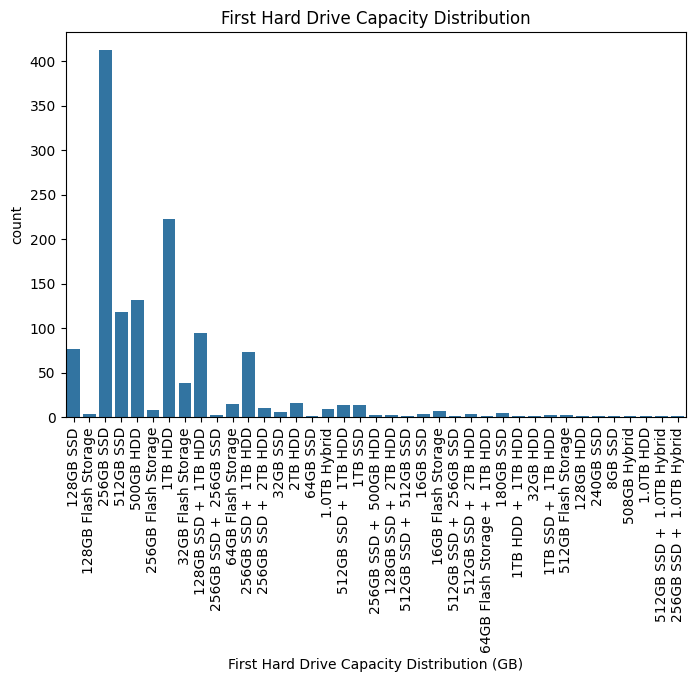

In [11]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

def num_plot(data, column, title, unit):
    # Plot the histogram using Seaborn's countplot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(x=column, data=data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel(f'{title} ({unit})')
    plt.title(title)
    plt.show()

# Assuming your DataFrame containing the data is named 'data'
num_plot(data, 'Memory', 'First Hard Drive Capacity Distribution', 'GB')


# What is the average price of laptops by company?

In [12]:
import plotly.express as px

# Assuming data is your DataFrame containing the data
company_list = data['Company'].unique()

filtered_data = data[data['Company'].isin(company_list)]
average_price_by_company = filtered_data.groupby('Company')['Price'].mean().reset_index()

fig = px.bar(average_price_by_company, x='Company', y='Price', 
             title='Average price of laptops by company',
             labels={'Company': 'Company', 'Price': 'Average Price'},
             color='Company',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text='Price')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis={'tickangle': 80})
fig.show()


# Data preprocessing

# 1. Removing column 'Unnamed: 0

In [13]:
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
812,Samsung,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.81kg,79866.72
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
293,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2kg,97449.12


# Checking for 'null values' & 'duplicate rows' in dataset

In [14]:
def count_percent(data):
    data_columns = pd.DataFrame({'Count Missing': data.isnull().sum(),
                                'Percent Missing': data.isnull().sum()*100/data.shape[0],
                                'Count Duplicate Rows': data.duplicated().sum(),
                                'Percent Duplicate Rows': data.duplicated().sum()*100/data.shape[0]
                                })
    return data_columns
count_percent(data) 

,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
Company,0,0.0,29,2.225633
TypeName,0,0.0,29,2.225633
Inches,0,0.0,29,2.225633
ScreenResolution,0,0.0,29,2.225633
Cpu,0,0.0,29,2.225633
Ram,0,0.0,29,2.225633
Memory,0,0.0,29,2.225633
Gpu,0,0.0,29,2.225633
OpSys,0,0.0,29,2.225633
Weight,0,0.0,29,2.225633


<mark> There are 29 duplicate rows.

In [15]:
count_non_duplicate_rows = data.duplicated(keep=False).sum() - data.duplicated().sum()
print("Out of {0} rows, {1} rows are original and {2} are duplicate rows.".format(data.duplicated(keep=False).sum(),count_non_duplicate_rows,data.duplicated().sum()))

Out of 43 rows, 14 rows are original and 29 are duplicate rows.


# Dropping duplicate rows

In [16]:

data.drop_duplicates(inplace=True)
print("Duplicate Rows: ",data.duplicated().sum())
print(data.shape)
count_percent(data)

Duplicate Rows:  0
(1274, 11)


,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
Company,0,0.0,0,0.0
TypeName,0,0.0,0,0.0
Inches,0,0.0,0,0.0
ScreenResolution,0,0.0,0,0.0
Cpu,0,0.0,0,0.0
Ram,0,0.0,0,0.0
Memory,0,0.0,0,0.0
Gpu,0,0.0,0,0.0
OpSys,0,0.0,0,0.0
Weight,0,0.0,0,0.0




* <mark>'Unnamed: 0' column is removed.

* <mark>We found 29 duplicated and rows and removed it.
* <mark>Now there are no more 'duplicate rows' and 'null values' in the dataset.</mark>

# using wishker approach to decide Budget , mid-range , expensive Laptop prices

In [17]:
min_price = data['Price'].min()
max_price = data['Price'].max()
median_price = data['Price'].median()

print("Minimum Price:", min_price)
print("Maximum Price:", max_price)
print("Median Price:", median_price)


Minimum Price: 9270.72
Maximum Price: 324954.72
Median Price: 52693.92


# Selecting Budget Laptops, Mid-range, expensive Price Range

In [18]:
labels = ['budget', 'Mid-range', 'expensive']

# Split the 'Price' column into categories using quartiles and assign labels
data['Price_Category'] = pd.qcut(data['Price'], q=[0, 0.33, 0.66, 1], labels=labels)

# Display the first few rows of the DataFrame with the new 'Price_Category' column
print(data[['Price', 'Price_Category']].head())


         Price Price_Category
0   71378.6832      expensive
1   47895.5232      Mid-range
2   30636.0000         budget
3  135195.3360      expensive
4   96095.8080      expensive


# Converting String Value Present in Ram, Memory, Weight into Numerical value

In [19]:
data['Ram'] = data['Ram'].str.extract('(\d+)').astype(float)
data['Memory'] = data['Memory'].str.extract('(\d+)').astype(float)
data['Weight'] = data['Weight'].str.extract('(\d+.\d+)').astype(float)


In [20]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_Category
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,expensive
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mid-range
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000,budget
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,expensive
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,expensive


#  Checking null value in weight

In [21]:
null_weight = data['Weight'].isnull().sum()

# Display the number of null values
print("Number of null values in the 'Weight' column:", null_weight)


Number of null values in the 'Weight' column: 50


# replacing null value in weight with mean

In [22]:
mean_weight = data['Weight'].mean()

data['Weight'].fillna(mean_weight, inplace=True)

# printing unique value in TypeName

In [23]:
unique_type_names = data['TypeName'].unique()

# Display the unique values
print("Unique values in the 'TypeName' column:")
for value in unique_type_names:
    print(value)


Unique values in the 'TypeName' column:
Ultrabook
Notebook
Netbook
Gaming
2 in 1 Convertible
Workstation


# categorical encoding

In [24]:
type_name_mapping = {
    'Ultrabook': 0,
    'Notebook': 1,
    'Netbook': 2,
    'Gaming': 3,
    '2 in 1 Convertible': 4,
    'Workstation': 5
}

data['TypeName'] = data['TypeName'].map(type_name_mapping)



# Checking Dataset Before deciding Features and Labels 

In [25]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_Category
0,Apple,0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,expensive
1,Apple,0,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mid-range
2,HP,1,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000,budget
3,Apple,0,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,expensive
4,Apple,0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,expensive


# Correlation Matrix

* The correlation matrix can give some useful informations about the linear correlation between the numerical features

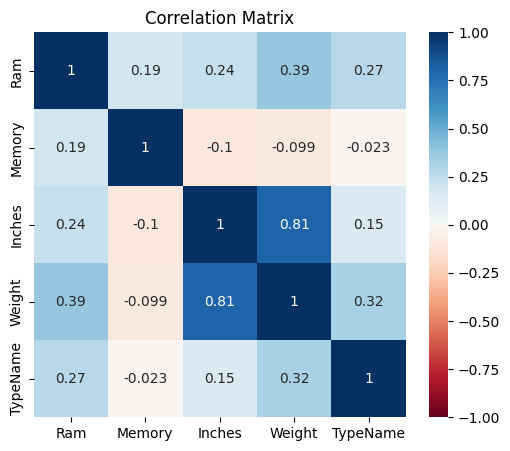

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns for correlation calculation
selected_columns = ['Ram', 'Memory', 'Inches', 'Weight', 'TypeName']
selected_data = data[selected_columns]

plt.figure(figsize=(6, 5))
sns.heatmap(selected_data.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


* <mark>RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher pric

* <mark>Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.

# Define features and target

In [27]:
X = data[['Ram', 'Memory', 'Inches', 'Weight', 'TypeName']]
y = data['Company']

# Split the dataset into 80% training and 20% testing

In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1019, 5) (1019,)
Testing set shape: (255, 5) (255,)


# Model-1 (RandomForestClassifier)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Print the training accuracy
training_accuracy = rf_classifier.score(X_train, y_train)
print("Training accuracy:", training_accuracy)


Training accuracy: 0.9018645731108931


# Predictions of Company

In [30]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Print the first few predictions
print("Predictions:", y_pred[:5])

# Print the actual values
print("Actual values:", y_test.values[:5])


Predictions: ['HP' 'Lenovo' 'Lenovo' 'Dell' 'HP']
Actual values: ['HP' 'Dell' 'Xiaomi' 'Dell' 'Dell']


In [31]:
# Print the feature names
print("Feature names:", X.columns.tolist())

# Print the unique values of the target variable
print("Unique company labels:", y.unique())


Feature names: ['Ram', 'Memory', 'Inches', 'Weight', 'TypeName']
Unique company labels: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


# Providing inputs for predictions

In [32]:
# Define the specifications for the laptop you want to predict
spec = [16, 512, 15.6, 3, 1]

spec = [spec]
company_pred = rf_classifier.predict(spec)
print("Predicted Company:", company_pred[0])




Predicted Company: Lenovo


# Model-2 (LinearRegression)

# Define features and target variable

In [33]:
X = data[['Ram', 'Memory', 'Inches', 'Weight', 'TypeName']]
y = data['Price']

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name}: MAE = {-scores.mean()} (±{scores.std()})")

# Train the best model on the entire training set
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)


Linear Regression: MAE = 17148.896974784722 (±777.17872292992)
Decision Tree: MAE = 14358.04686958316 (±1395.4092472105663)


Random Forest: MAE = 12290.942519498396 (±933.7219958842466)
Gradient Boosting: MAE = 12941.940647067655 (±445.63436217606977)


RandomForestRegressor(random_state=42)

# Predictions vs actual values vs company names

In [35]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Select the first few predictions, actual values, and company names from the original dataset 'data'
predictions_df = pd.DataFrame({
    'Actual Price': y_test.values[:5],
    'Predicted Price': y_pred[:5],
    'Company': data.loc[X_test.index[:5], 'Company']  # Assuming 'Company' is the column name for company names in 'data'
})

# Print the DataFrame
print(predictions_df)


     Actual Price  Predicted Price Company
309    24988.3200     20353.739791      HP
622    41345.2800     24528.623802    Dell
184    63882.7200     63483.290052  Xiaomi
705    42357.6000     43016.424577    Dell
522    68184.0144     59898.614709    Dell


# Random 5 Prediction for Prices

In [36]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Print the first few predictions
print("Predictions:", y_pred[:5])

# Print the actual values
print("Actual values:", y_test.values[:5])


Predictions: ['HP' 'Lenovo' 'Lenovo' 'Dell' 'HP']
Actual values: [24988.32   41345.28   63882.72   42357.6    68184.0144]


# selecting the specifications for the laptop you want to predict

In [37]:
# Define the specifications for the laptop you want to predict
spec = [[8, 128, 13.3, 1.37, 0]]

# Make predictions using the trained model
price_pred = best_model.predict(spec)

# Print the predicted price
print("Predicted Price:", price_pred[0])


Predicted Price: 66922.73427599993


# Define the specifications for the laptop you want to predict based on budget, Mid-range, expensive

In [38]:
# Define the specifications for the laptop you want to predict
spec = [[16, 256, 13.3, 1.37, 0]]


price_pred = best_model.predict(spec)
print("Predicted Price:", price_pred[0])


if price_pred[0] <= data['Price'].quantile(0.33):
    category = 'budget'
elif price_pred[0] >= data['Price'].quantile(0.66):
    category = 'expensive'
else:
    category = 'Mid-range'

# Print the price category
print("Price Category:", category)


Predicted Price: 96809.43499199998
Price Category: expensive


# Predictions with User Choice

In [39]:
import pandas as pd

# Define the feature names
feature_names = ['Ram', 'Memory', 'Inches', 'Weight', 'TypeName']

# Initialize an empty dictionary to store user-provided values
spec = {}

# Ask the user to provide values for each feature
for feature in feature_names:
    value = input("Enter value for {}: ".format(feature))
    spec[feature] = value

# Convert the user-provided values to the desired format
ram = int(spec['Ram'])
memory = int(spec['Memory'])
inches = float(spec['Inches'])
weight = float(spec['Weight'])
type_name = spec['TypeName']

# Construct the spec list using the user-provided values
spec = [[ram, memory, inches, weight, type_name]]

# Make predictions using the trained model
price_pred = best_model.predict(spec)

# Print the predicted price
print("Predicted Price:", price_pred[0])

# Determine the price category
if price_pred[0] <= data['Price'].quantile(0.33):
    category = 'budget'
elif price_pred[0] >= data['Price'].quantile(0.66):
    category = 'expensive'
else:
    category = 'Mid-range'

# Print the price category
print("Price Category:", category)


Predicted Price: 85096.7050463999
Price Category: expensive
